In [1]:
# library import

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# 1. Input data

In [2]:
# generate simulation data

np.random.seed(45651875)

m = 1000

X = 10 * (np.random.rand(m, 1) - 0.5)
error = np.random.randn(m, 1)

theta_0 = -6
theta_1 = 3

Y = theta_0 + theta_1 * X + error

In [3]:
# array for straight line

x_plot = np.linspace(-6, 6, 101)
y_plot = theta_0 + theta_1 * x_plot

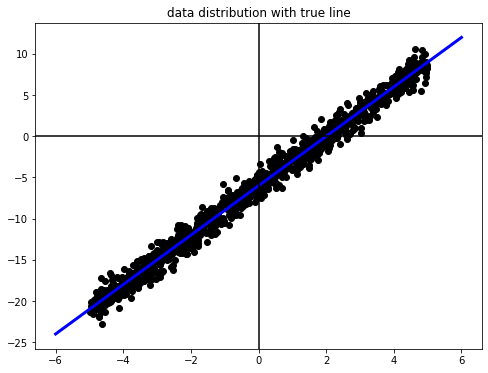

In [4]:
# plotting

plt.figure(figsize=(8, 6))
plt.plot(X, Y, 'ko') # scatter plot
plt.plot(x_plot, y_plot, 'b', linewidth=3) # straight line
plt.axhline(y=0, color='k') # x axis
plt.axvline(x=0, color='k') # y axis
plt.title('data distribution with true line')
plt.show()

# 2. Output results

In [5]:
def make_regression(X, Y):
    
    # set random initial condition of parameters
    
    m = len(Y)

    initial_theta_0 = np.random.randn(1)
    initial_theta_1 = np.random.randn(1)
    list_theta_0 = [initial_theta_0]
    list_theta_1 = [initial_theta_1]
    
    initial_loss = np.sum((initial_theta_0 + initial_theta_1 * X - Y)**2) / (2*m)
    list_loss = [initial_loss]

    temp_theta_0 = initial_theta_0
    temp_theta_1 = initial_theta_1
    temp_loss = initial_loss
    
    learning_rate = 0.01
    error_bound = 0.00001

    # model learning

    while True:
        # calculate gradient
        gradient_theta_0 = np.sum(temp_theta_0 + temp_theta_1 * X - Y) / m
        gradient_theta_1 = np.sum((temp_theta_0 + temp_theta_1 * X - Y) * X) / m
    
        # renew the parameters
        next_theta_0 = temp_theta_0 - learning_rate * gradient_theta_0
        next_theta_1 = temp_theta_1 - learning_rate * gradient_theta_1
    
        temp_theta_0 = next_theta_0
        temp_theta_1 = next_theta_1
    
        # calculate loss to evaluate the parameters
        next_loss = np.sum((next_theta_0 + next_theta_1 * X - Y)**2) / (2*m)
    
        # store results
        list_theta_0.append(next_theta_0)
        list_theta_1.append(next_theta_1)
        list_loss.append(next_loss)
    
        # stopping rule
        if temp_loss - next_loss < error_bound:
            break
    
        temp_loss = next_loss
    
    theta_0_hat = list_theta_0[-1]
    theta_1_hat = list_theta_1[-1]
    
    return theta_0_hat, theta_1_hat, list_theta_0, list_theta_1, list_loss

In [6]:
theta_0_hat, theta_1_hat, list_theta_0, list_theta_1, list_loss = make_regression(X, Y)

In [7]:
print(' My linear regression model estimates the paramaters as follows. \n theta_0 : {}, theta_1 : {}'.format(theta_0_hat, theta_1_hat))

 My linear regression model estimates the paramaters as follows. 
 theta_0 : [-5.97848892], theta_1 : [2.99423338]


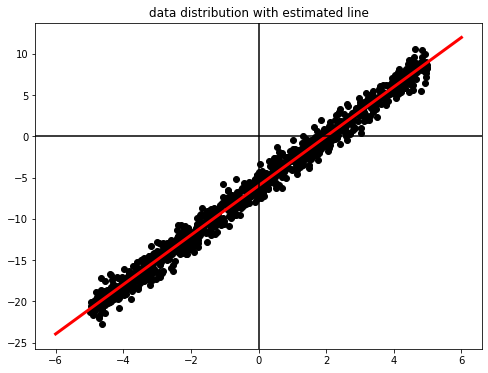

In [8]:
y_hat_plot = theta_0_hat + theta_1_hat * x_plot

# plotting

plt.figure(figsize=(8, 6))
plt.plot(X, Y, 'ko') # scatter plot
plt.plot(x_plot, y_hat_plot, 'r', linewidth=3) # estimated straight line
plt.axhline(y=0, color='k') # x axis
plt.axvline(x=0, color='k') # y axis
plt.title('data distribution with estimated line')
plt.show()

# 3. Plotting the energy values

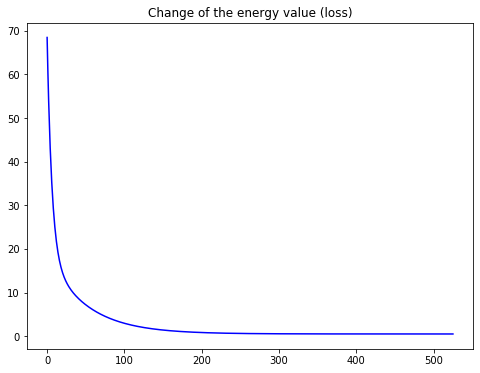

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(list_loss, 'b')
plt.title('Change of the energy value (loss)')
plt.show()

# energy value가 수렴한 것을 그래프를 통해 확인할 수 있다.

# 4. Plotting the model parameters

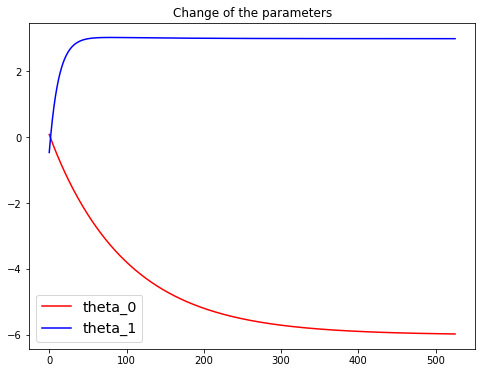

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(list_theta_0, 'r', label='theta_0')
plt.plot(list_theta_1, 'b', label='theta_1')
plt.legend(loc='best', fontsize='x-large')
plt.title('Change of the parameters')
plt.show()

# theta_0와 theta_1이 수렴한 것을 알 수 있다.